In [2]:
import os
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.applications.inception_v3 import InceptionV3
keras.__version__

Using TensorFlow backend.


'2.2.4'

## Preprocessing

In [16]:
class1 = 'nosymptoms'
class2 = 'symptoms'
baseDir = './dataset'

#Training
subDir = 'train'
trainDir = os.path.join(baseDir, subDir)
trainNoSymptomsDir = os.path.join(baseDir, subDir, class1)
trainSymptomsDir = os.path.join(baseDir, subDir, class2)

#Validation
subDir = 'validation'
valDir = os.path.join(baseDir, subDir)
valNoSymptomsDir = os.path.join(baseDir, subDir, class1)
valSymptomsDir = os.path.join(baseDir, subDir, class2)

#Test
subDir = 'test'
testDir = os.path.join(baseDir, subDir)
testNoSymptomsDir = os.path.join(baseDir, subDir, class1)
testSymptomsDir = os.path.join(baseDir, subDir, class2)


In [17]:
from keras.preprocessing.image import ImageDataGenerator
import random

imageSize = 128
batchSize = 15
seed = random.randint(0,200)

trainDatagen = ImageDataGenerator(rescale=1./255)
valDatagen = ImageDataGenerator(rescale=1./255)
testDatagen = ImageDataGenerator(rescale=1./255)


trainGenerator = trainDatagen.flow_from_directory(
    trainDir,
    target_size=(imageSize,imageSize),
    batch_size=batchSize,
    class_mode='binary',
    seed=seed
)

valGenerator = valDatagen.flow_from_directory(
    valDir,
    target_size=(imageSize,imageSize),
    batch_size=batchSize,
    class_mode='binary',
    seed=seed,
    #save_to_dir='./altered', save_prefix='image'
)

testGenerator = testDatagen.flow_from_directory(
    testDir,
    target_size=(imageSize,imageSize),
    batch_size=batchSize,
    class_mode='binary',
    seed=seed
)

Found 1484 images belonging to 2 classes.
Found 372 images belonging to 2 classes.
Found 207 images belonging to 2 classes.


In [18]:
i = 0
for dataBatch, labelsBatch in trainGenerator:
    print('data batch shape:', dataBatch.shape)
    print('labels batch shape:', labelsBatch.shape)
    i = i + 1
    if i > 5:
        break

data batch shape: (15, 128, 128, 3)
labels batch shape: (15,)
data batch shape: (15, 128, 128, 3)
labels batch shape: (15,)
data batch shape: (15, 128, 128, 3)
labels batch shape: (15,)
data batch shape: (15, 128, 128, 3)
labels batch shape: (15,)
data batch shape: (15, 128, 128, 3)
labels batch shape: (15,)
data batch shape: (15, 128, 128, 3)
labels batch shape: (15,)


In [19]:
labelsBatch

array([0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
      dtype=float32)

In [20]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(imageSize,imageSize,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
#Flatten to decition making
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 61, 61, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        18464     
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                401424    
__________

In [21]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer='rmsprop',
             metrics=['acc'])

In [22]:
results = model.fit_generator(
    trainGenerator,
    steps_per_epoch=2,
    verbose=1,
    epochs=10,
    validation_data= valGenerator,
    validation_steps=15)

#save model
model.save('case2run1.h5')

Epoch 1/10
2/2 [==============================] - 30s 15s/step - loss: 0.6997 - acc: 0.5667 - val_loss: 1.0585 - val_acc: 0.2800
Epoch 2/10
2/2 [==============================] - 28s 14s/step - loss: 0.9285 - acc: 0.2333 - val_loss: 0.6809 - val_acc: 0.7027
Epoch 3/10
2/2 [==============================] - 29s 14s/step - loss: 0.6780 - acc: 0.6667 - val_loss: 0.6101 - val_acc: 0.7422
Epoch 4/10
2/2 [==============================] - 27s 13s/step - loss: 0.5902 - acc: 0.7000 - val_loss: 0.7174 - val_acc: 0.6667
Epoch 5/10
2/2 [==============================] - 29s 14s/step - loss: 0.6225 - acc: 0.7000 - val_loss: 0.5408 - val_acc: 0.7297
Epoch 6/10
2/2 [==============================] - 28s 14s/step - loss: 0.7155 - acc: 0.5667 - val_loss: 0.6273 - val_acc: 0.7333
Epoch 7/10
2/2 [==============================] - 28s 14s/step - loss: 0.5960 - acc: 0.7667 - val_loss: 0.5742 - val_acc: 0.6937
Epoch 8/10
2/2 [==============================] - 28s 14s/step - loss: 0.6226 - acc: 0.6667 - val

## Results

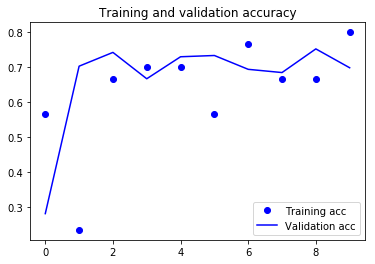

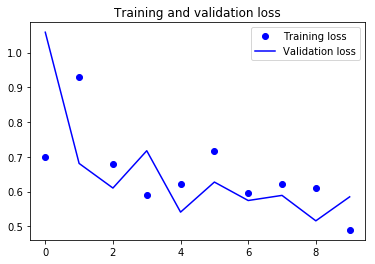

In [23]:
acc = results.history['acc']
val_acc = results.history['val_acc']
loss = results.history['loss']
val_loss = results.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [24]:
testLoss, testAcc = model.evaluate_generator(testGenerator, steps=testGenerator.n/batchSize, verbose=1)
testLoss, testAcc

14/13 [==============================] - 26s 2s/step


(0.5778898255548616, 0.7101449426533519)

In [25]:
testGenerator.reset()
predProb = model.predict_generator(testGenerator,
                                   steps=testGenerator.n/batchSize,
                                   verbose=1)

14/13 [==============================] - 26s 2s/step


In [26]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sb

predictions = np.argmax(predProb, axis=1)
cm = confusion_matrix(testGenerator.classes, predictions)

dfCm = pd.DataFrame(cm.T,
                    index=['Negatives','Positives'],
                    columns=['True', 'False'])

TP = dfCm.loc['Positives']['True']
TN = dfCm.loc['Negatives']['True']
FP = dfCm.loc['Positives']['False']
FN = dfCm.loc['Negatives']['False']

print('Sensitivity: ', TP/TP+FN)
print('Specificity: ', TN/TN+FP)

Sensitivity:  nan
Specificity:  1.0


C:\Users\Markus\Anaconda3\envs\py36g\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in longlong_scalars


In [27]:
print('Confusion matrix:\n', dfCm)

Confusion matrix:
            True  False
Negatives   147     60
Positives     0      0


In [28]:
print('Normalized confusion matrix:\n',dfCm/len(predictions))

Normalized confusion matrix:
                True     False
Negatives  0.710145  0.289855
Positives  0.000000  0.000000
